In [ ]:
!pip install langchain_community transformers faiss-cpu torch --quiet
!pip install python-telegram-bot[asyncio] langchain openai transformers faiss-cpu sentence-transformers pandas torch fastapi uvicorn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Все каналы


In [ ]:
from openai import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage


llm = ChatOpenAI(
    openai_api_key=" ",  
    openai_api_base="https://api.deepseek.com/v1",  
    model="deepseek-chat",  
)



<ipython-input-2-7604816384b7>:6: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

data_dir = "/content/drive/MyDrive/diploma_rag"  # путь к папке с CSV-файлами
combined_df = pd.read_csv(os.path.join(data_dir, 'combined_df.csv'), encoding="utf-8")
combined_df.drop(columns=['Unnamed: 0'], inplace=True)
combined_df

,category,country,channel,handle,name,description,image,subscribers
0,apps,Global,https://t.me/coubnews,@coubnews,Coub.com News,"Coub: Watch, Create, Earn!",https://static8.tgstat.ru/channels/_100/7c/7ce...,2759386
1,apps,RU,https://t.me/TikTokModCloud,@TikTokModCloud,TikTokModCloud,№ 4776856073,https://static7.tgstat.ru/channels/_100/23/237...,1796424
2,apps,Global,https://t.me/AssemBlogger,@AssemBlogger,تحديثات واتساب الذهبي,اذا واجهتك اي مشكله وتريد الاستفسار يمكنك التو...,https://static7.tgstat.ru/channels/_100/ce/cea...,1404952
3,apps,IR,https://t.me/irproxy,@irproxy,پروکسی ملی | وی پی ان ᴠᴘɴ,FAST MTPROTO PROXIES FOR TELEGRAM,https://static3.tgstat.ru/channels/_100/73/730...,1288779
4,apps,RU,https://t.me/EasyAPK,@EasyAPK,📲 Easy APK,Бесплатные игры и программы для Android,https://static3.tgstat.ru/channels/_100/d2/d29...,1150436
...,...,...,...,...,...,...,...,...
578657,telegram,Global,https://t.me/paypal_transfers_cashout,@paypal_transfers_cashout,ᴘᴀʏᴘᴀʟ CASH OUT MEƦCH ᴛʀᴀɴꜱꜰᴇʀꜱ,Telenet Mɪxᴇʀwork PayPal,https://static8.tgstat.ru/channels/_100/5b/5b0...,1
578658,telegram,Global,https://t.me/BareskrimPolri,@BareskrimPolri,Bareskrim Polri,Official account bareskrim polri telegram.,https://static9.tgstat.ru/channels/_100/8b/8b5...,1
578659,telegram,RU,https://t.me/EVVolkova24,@EVVolkova24,ТЕСТОВЫЙ_Я,Красота/здоровье Инвестируй в себя,https://static1.tgstat.ru/channels/_100/d6/d64...,1
578660,telegram,Global,https://t.me/GetMoneyPass,@GetMoneyPass,Moneypass,Are you ready to unlock the secrets of financi...,https://static1.tgstat.ru/channels/_100/73/730...,1


# EDA

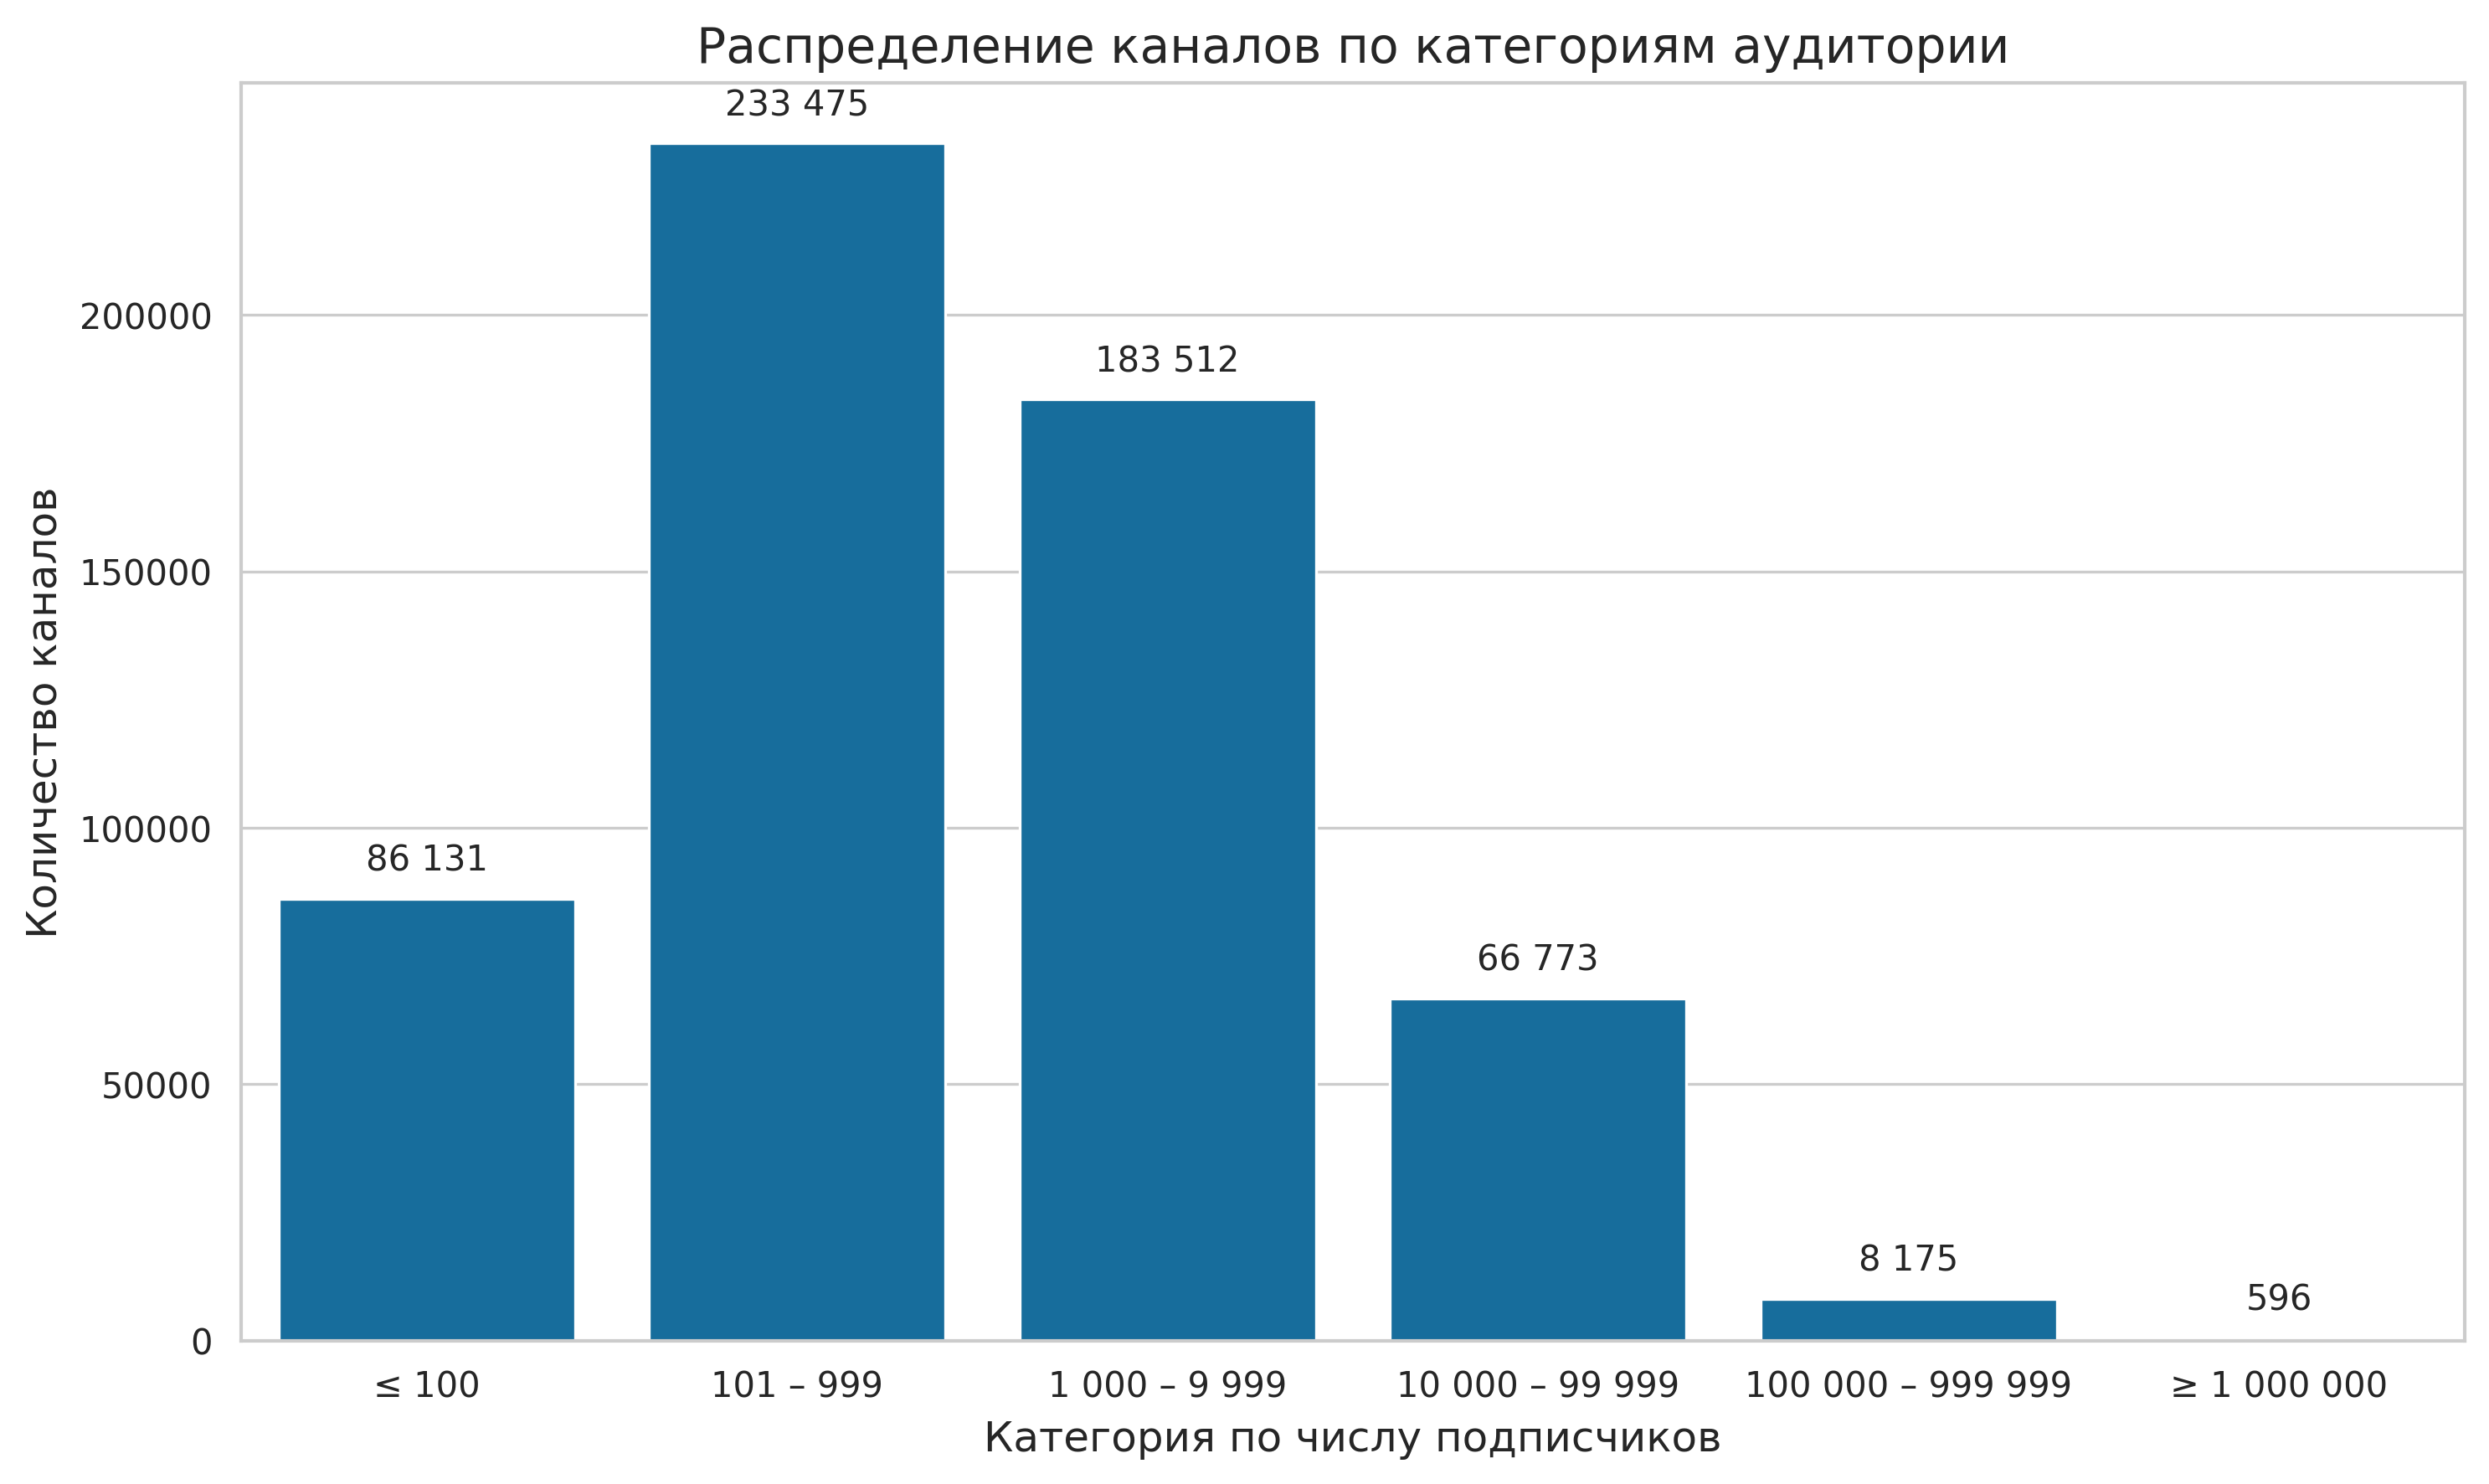

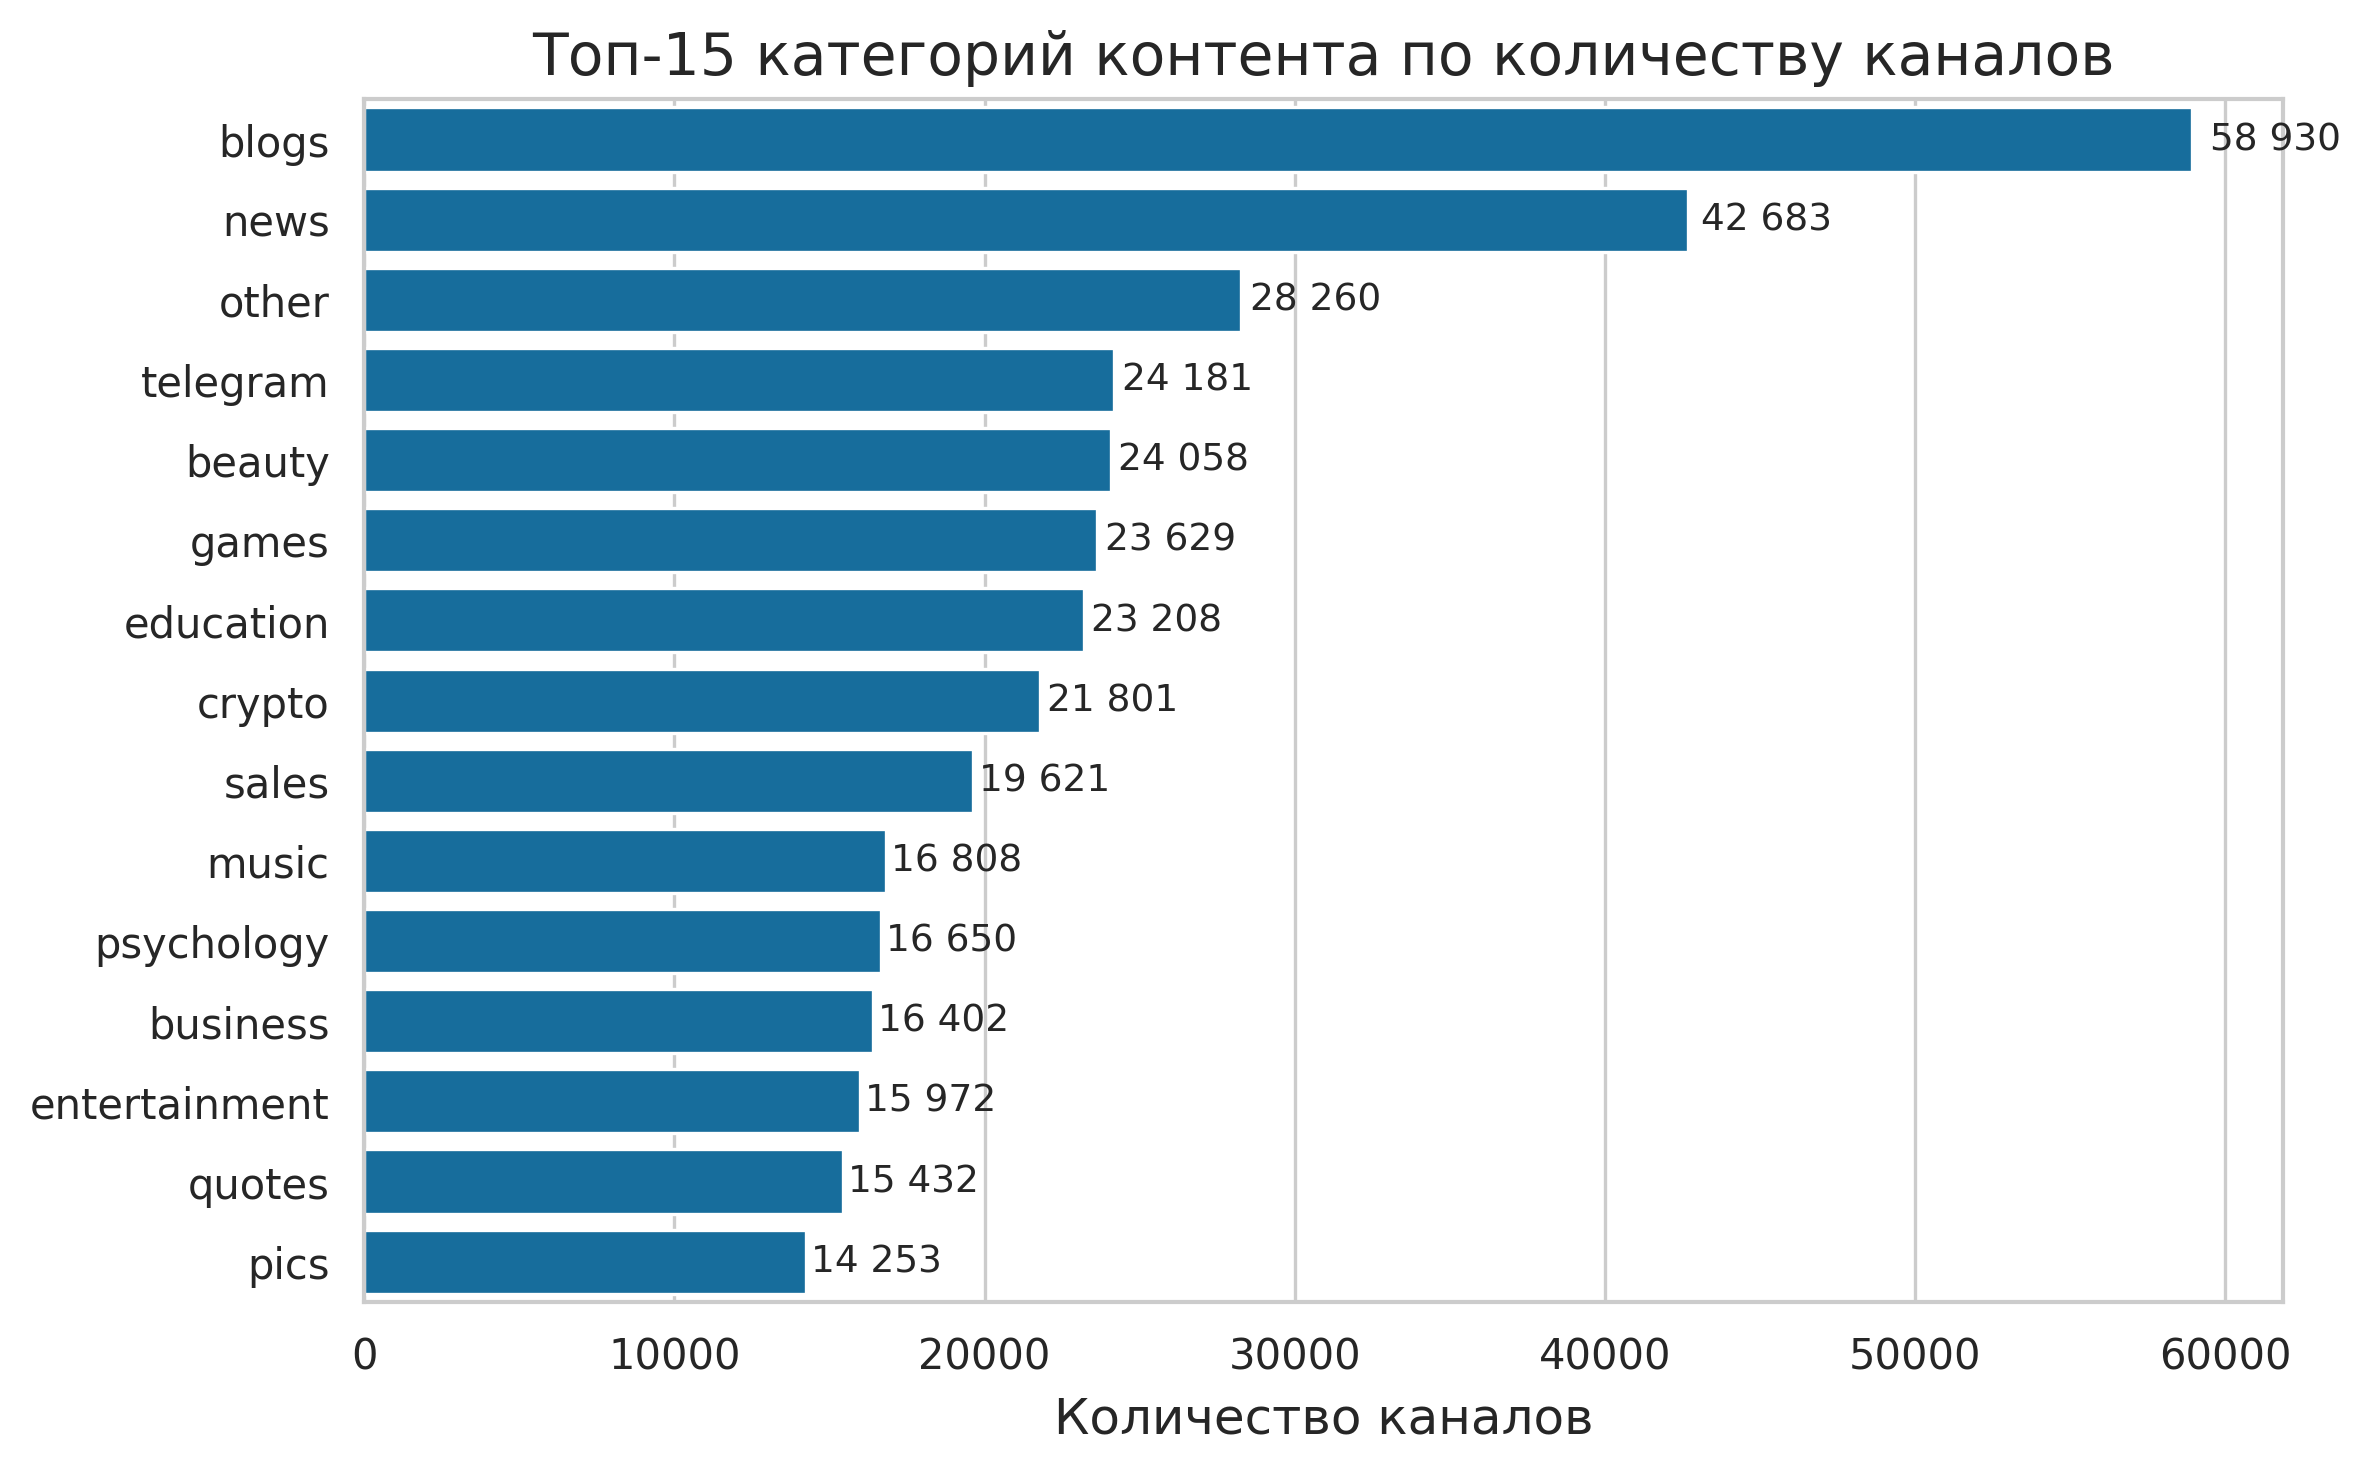

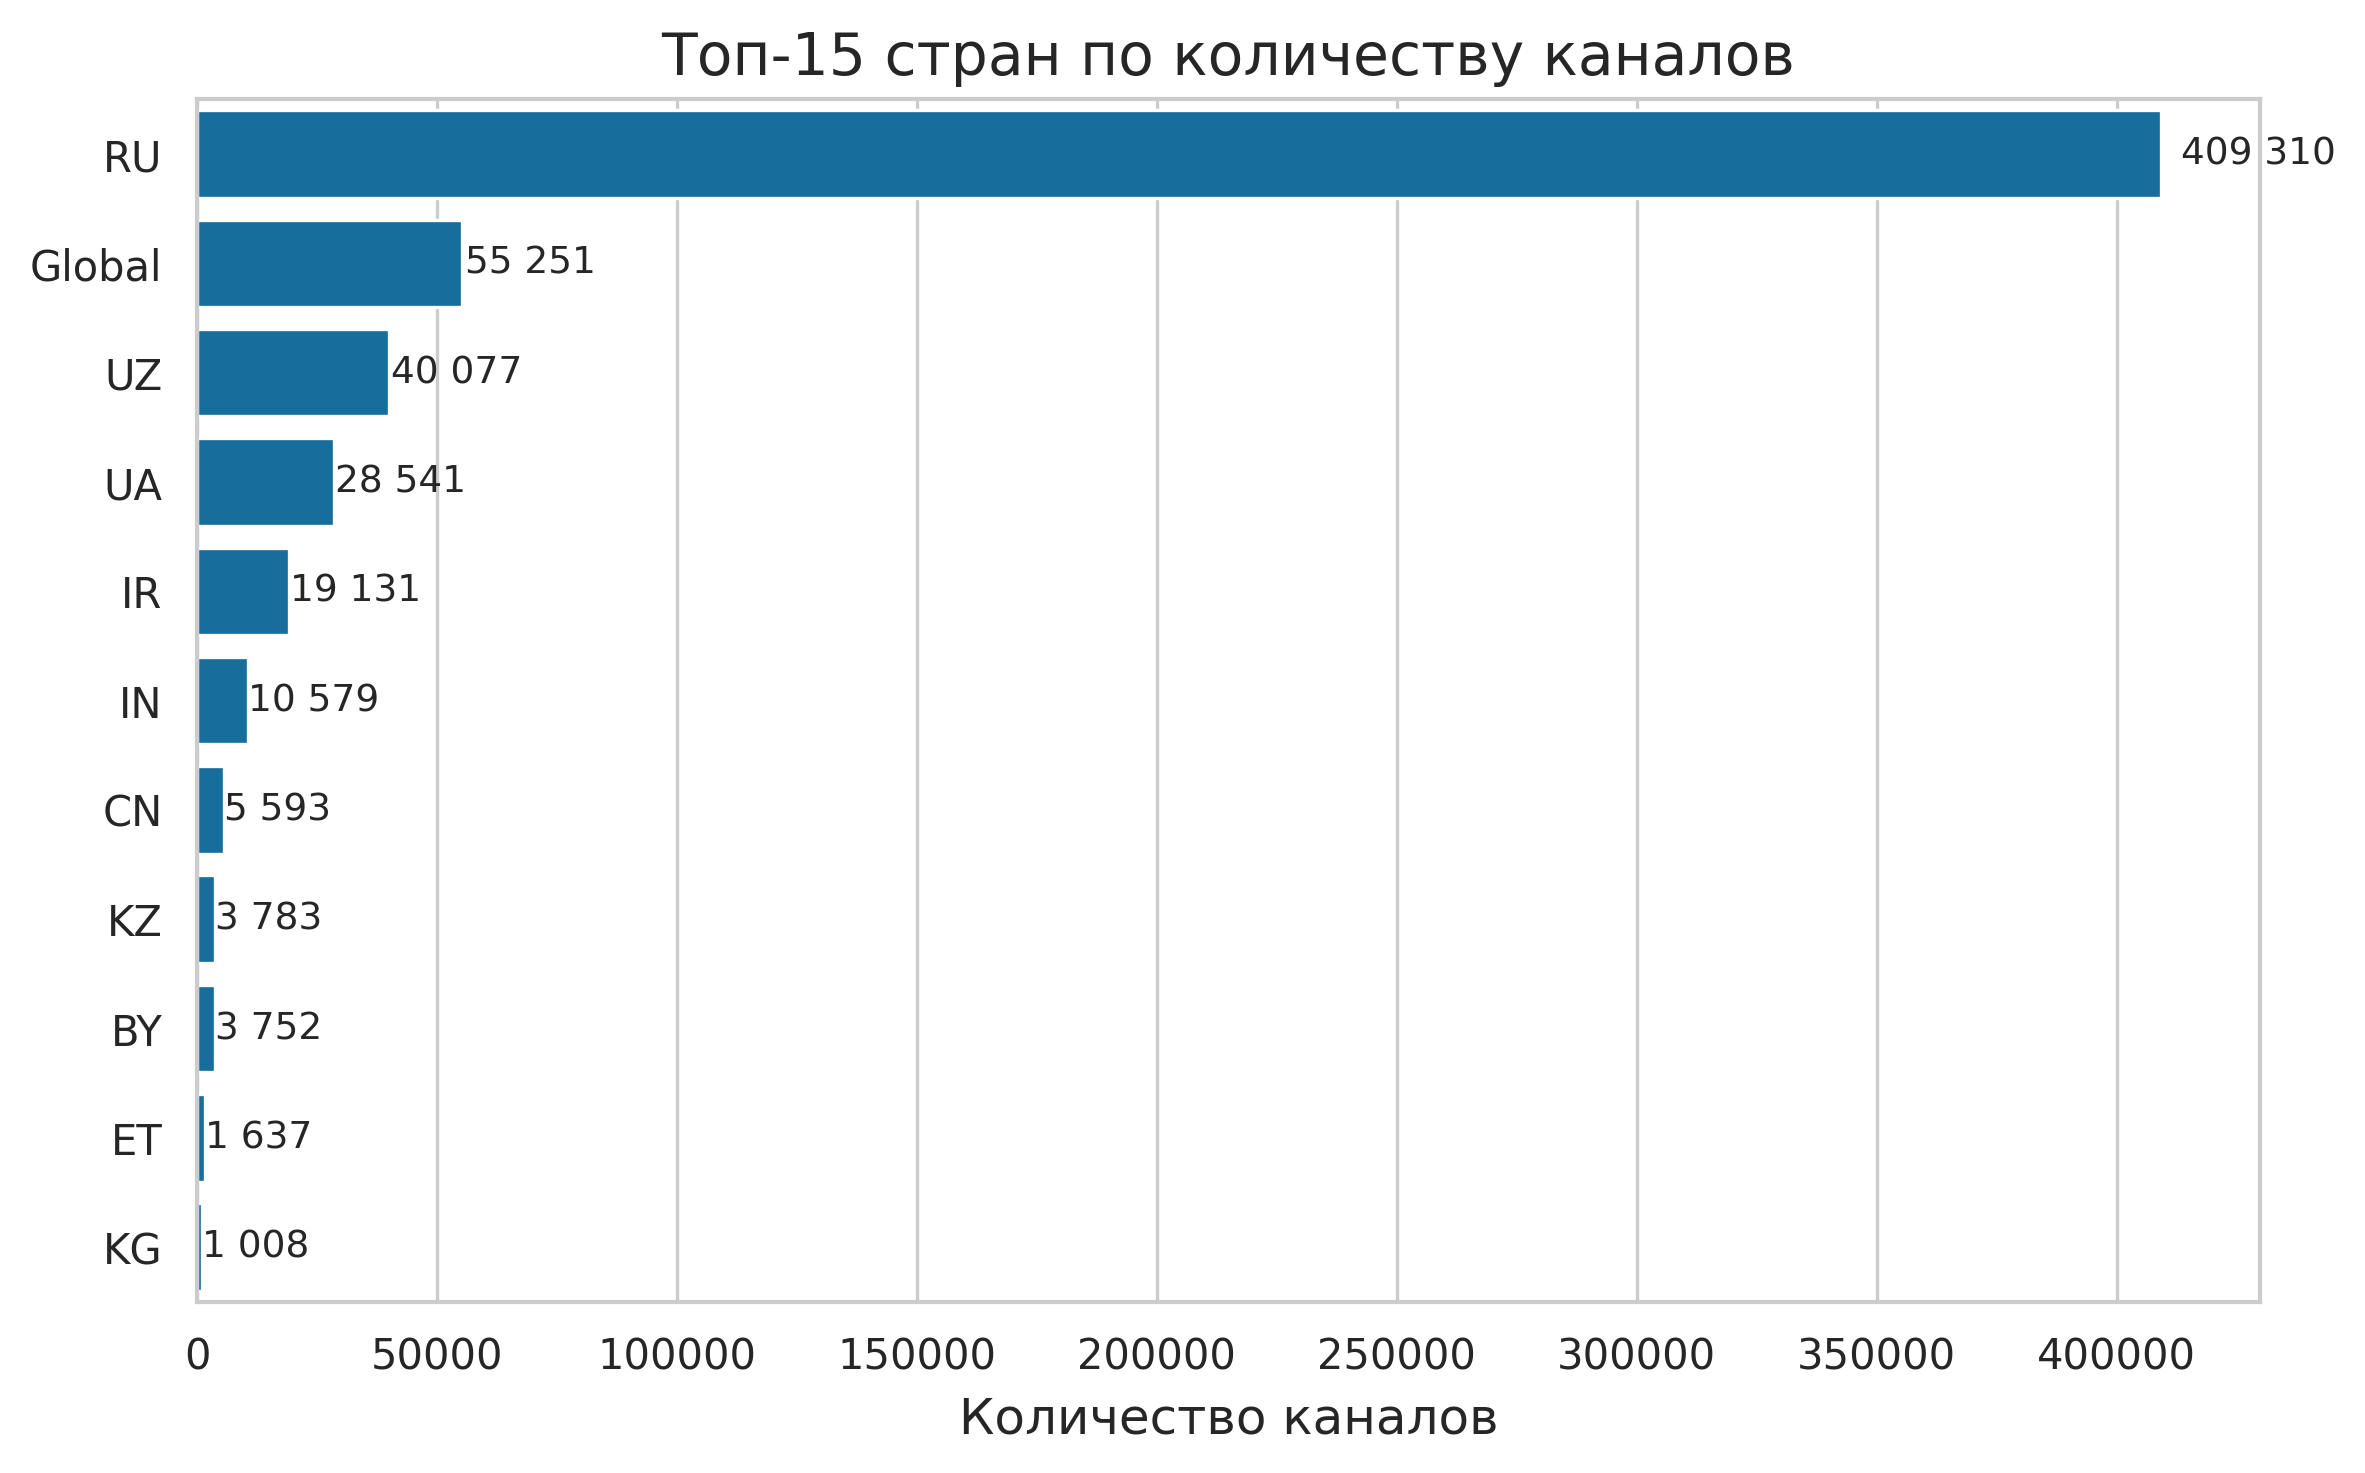

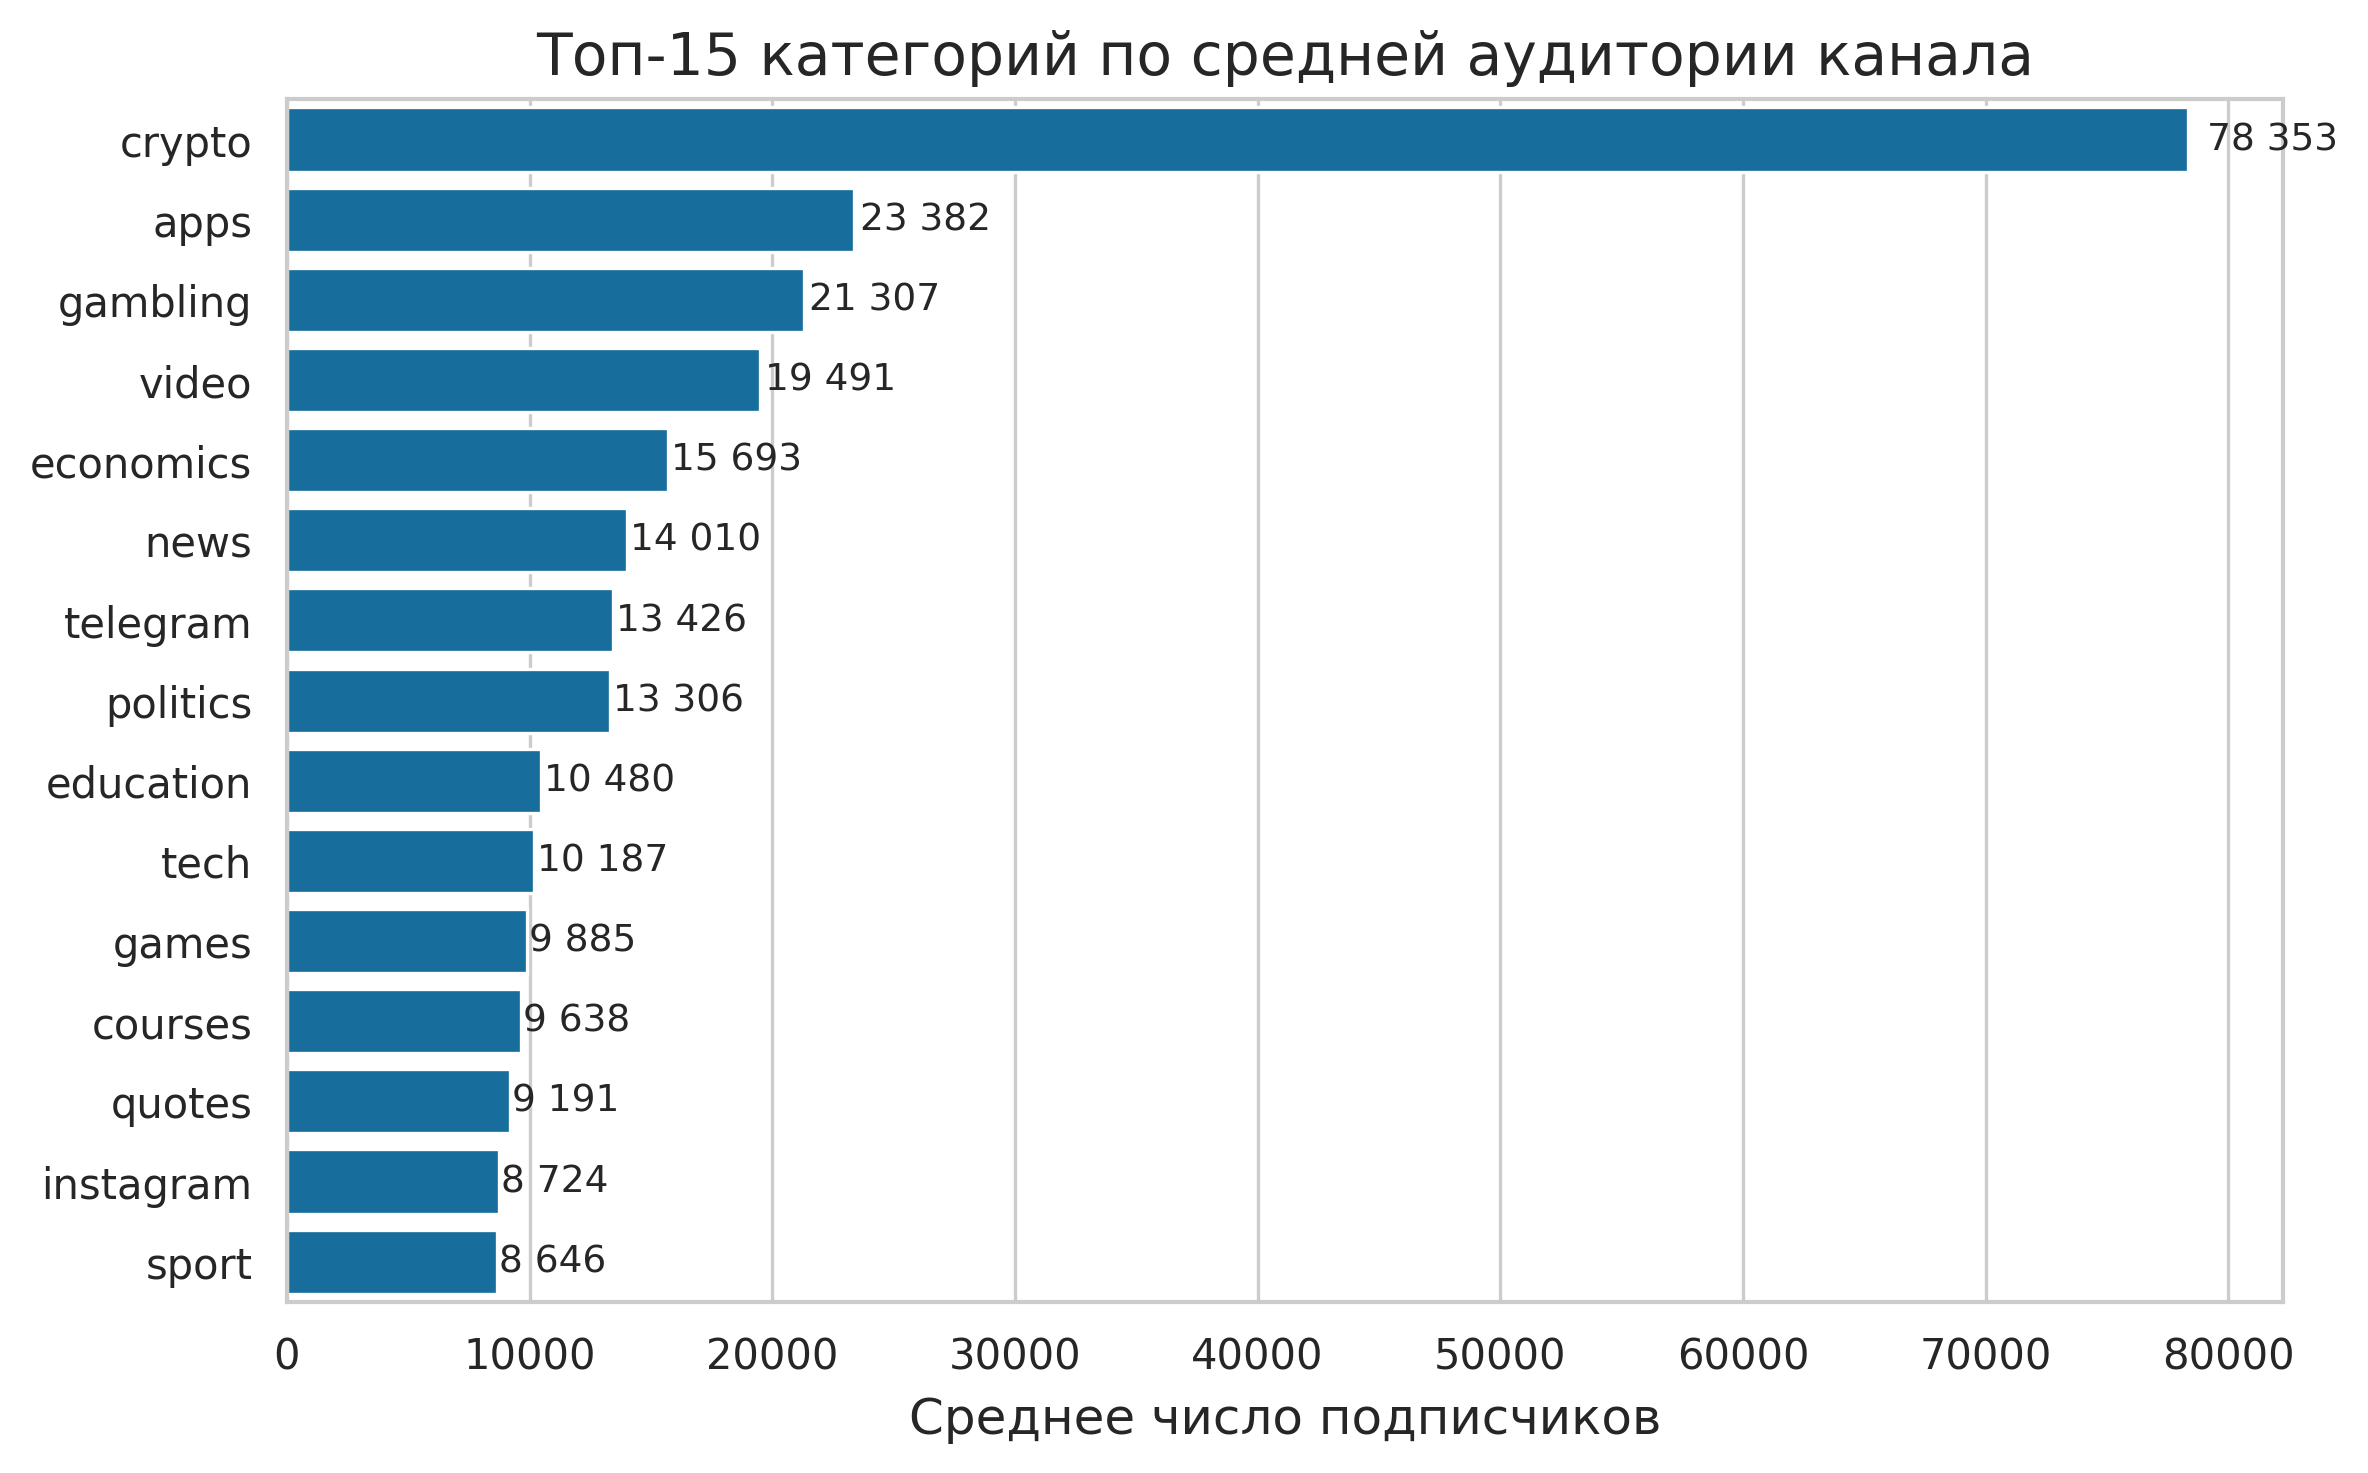

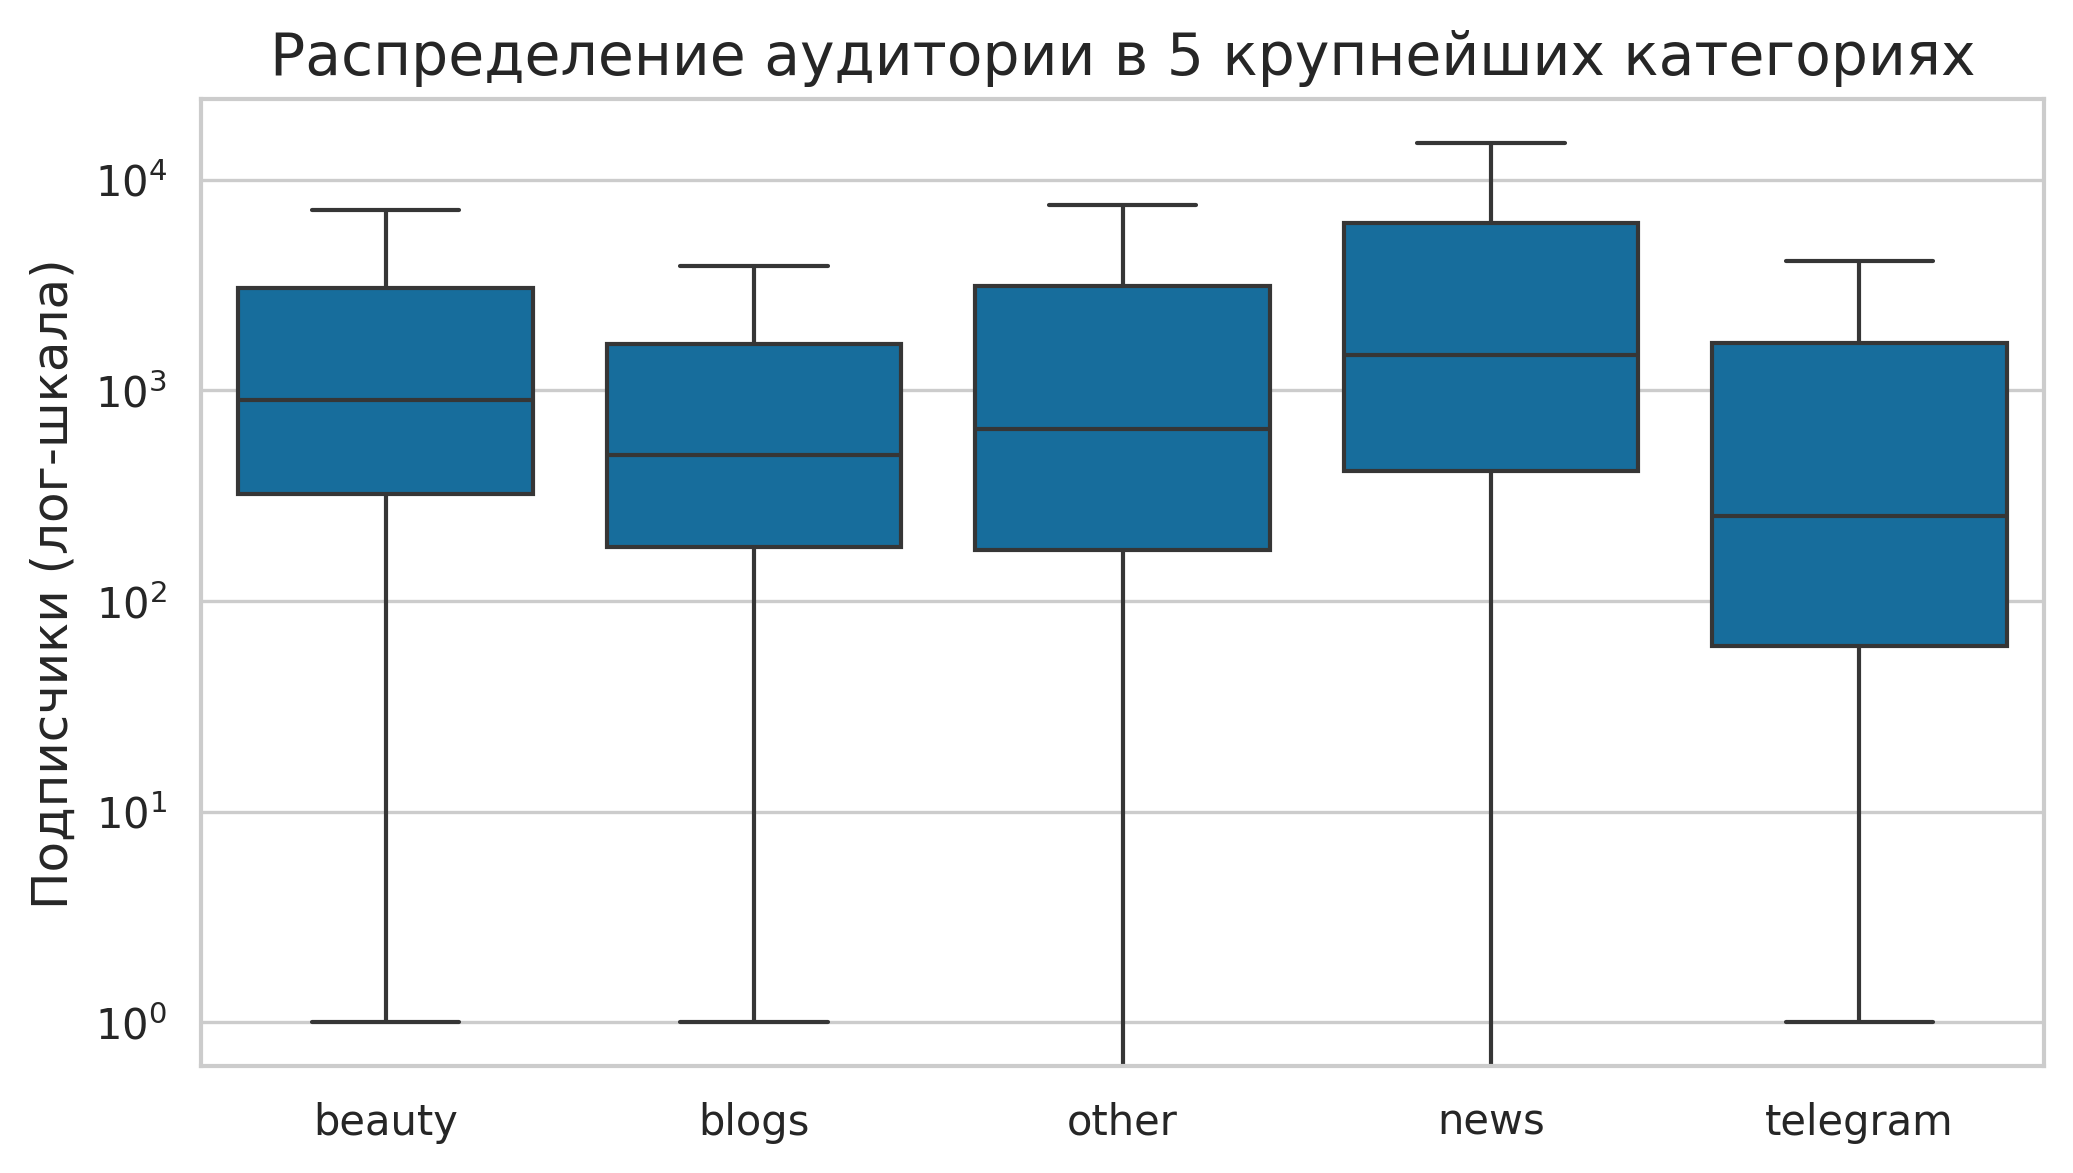

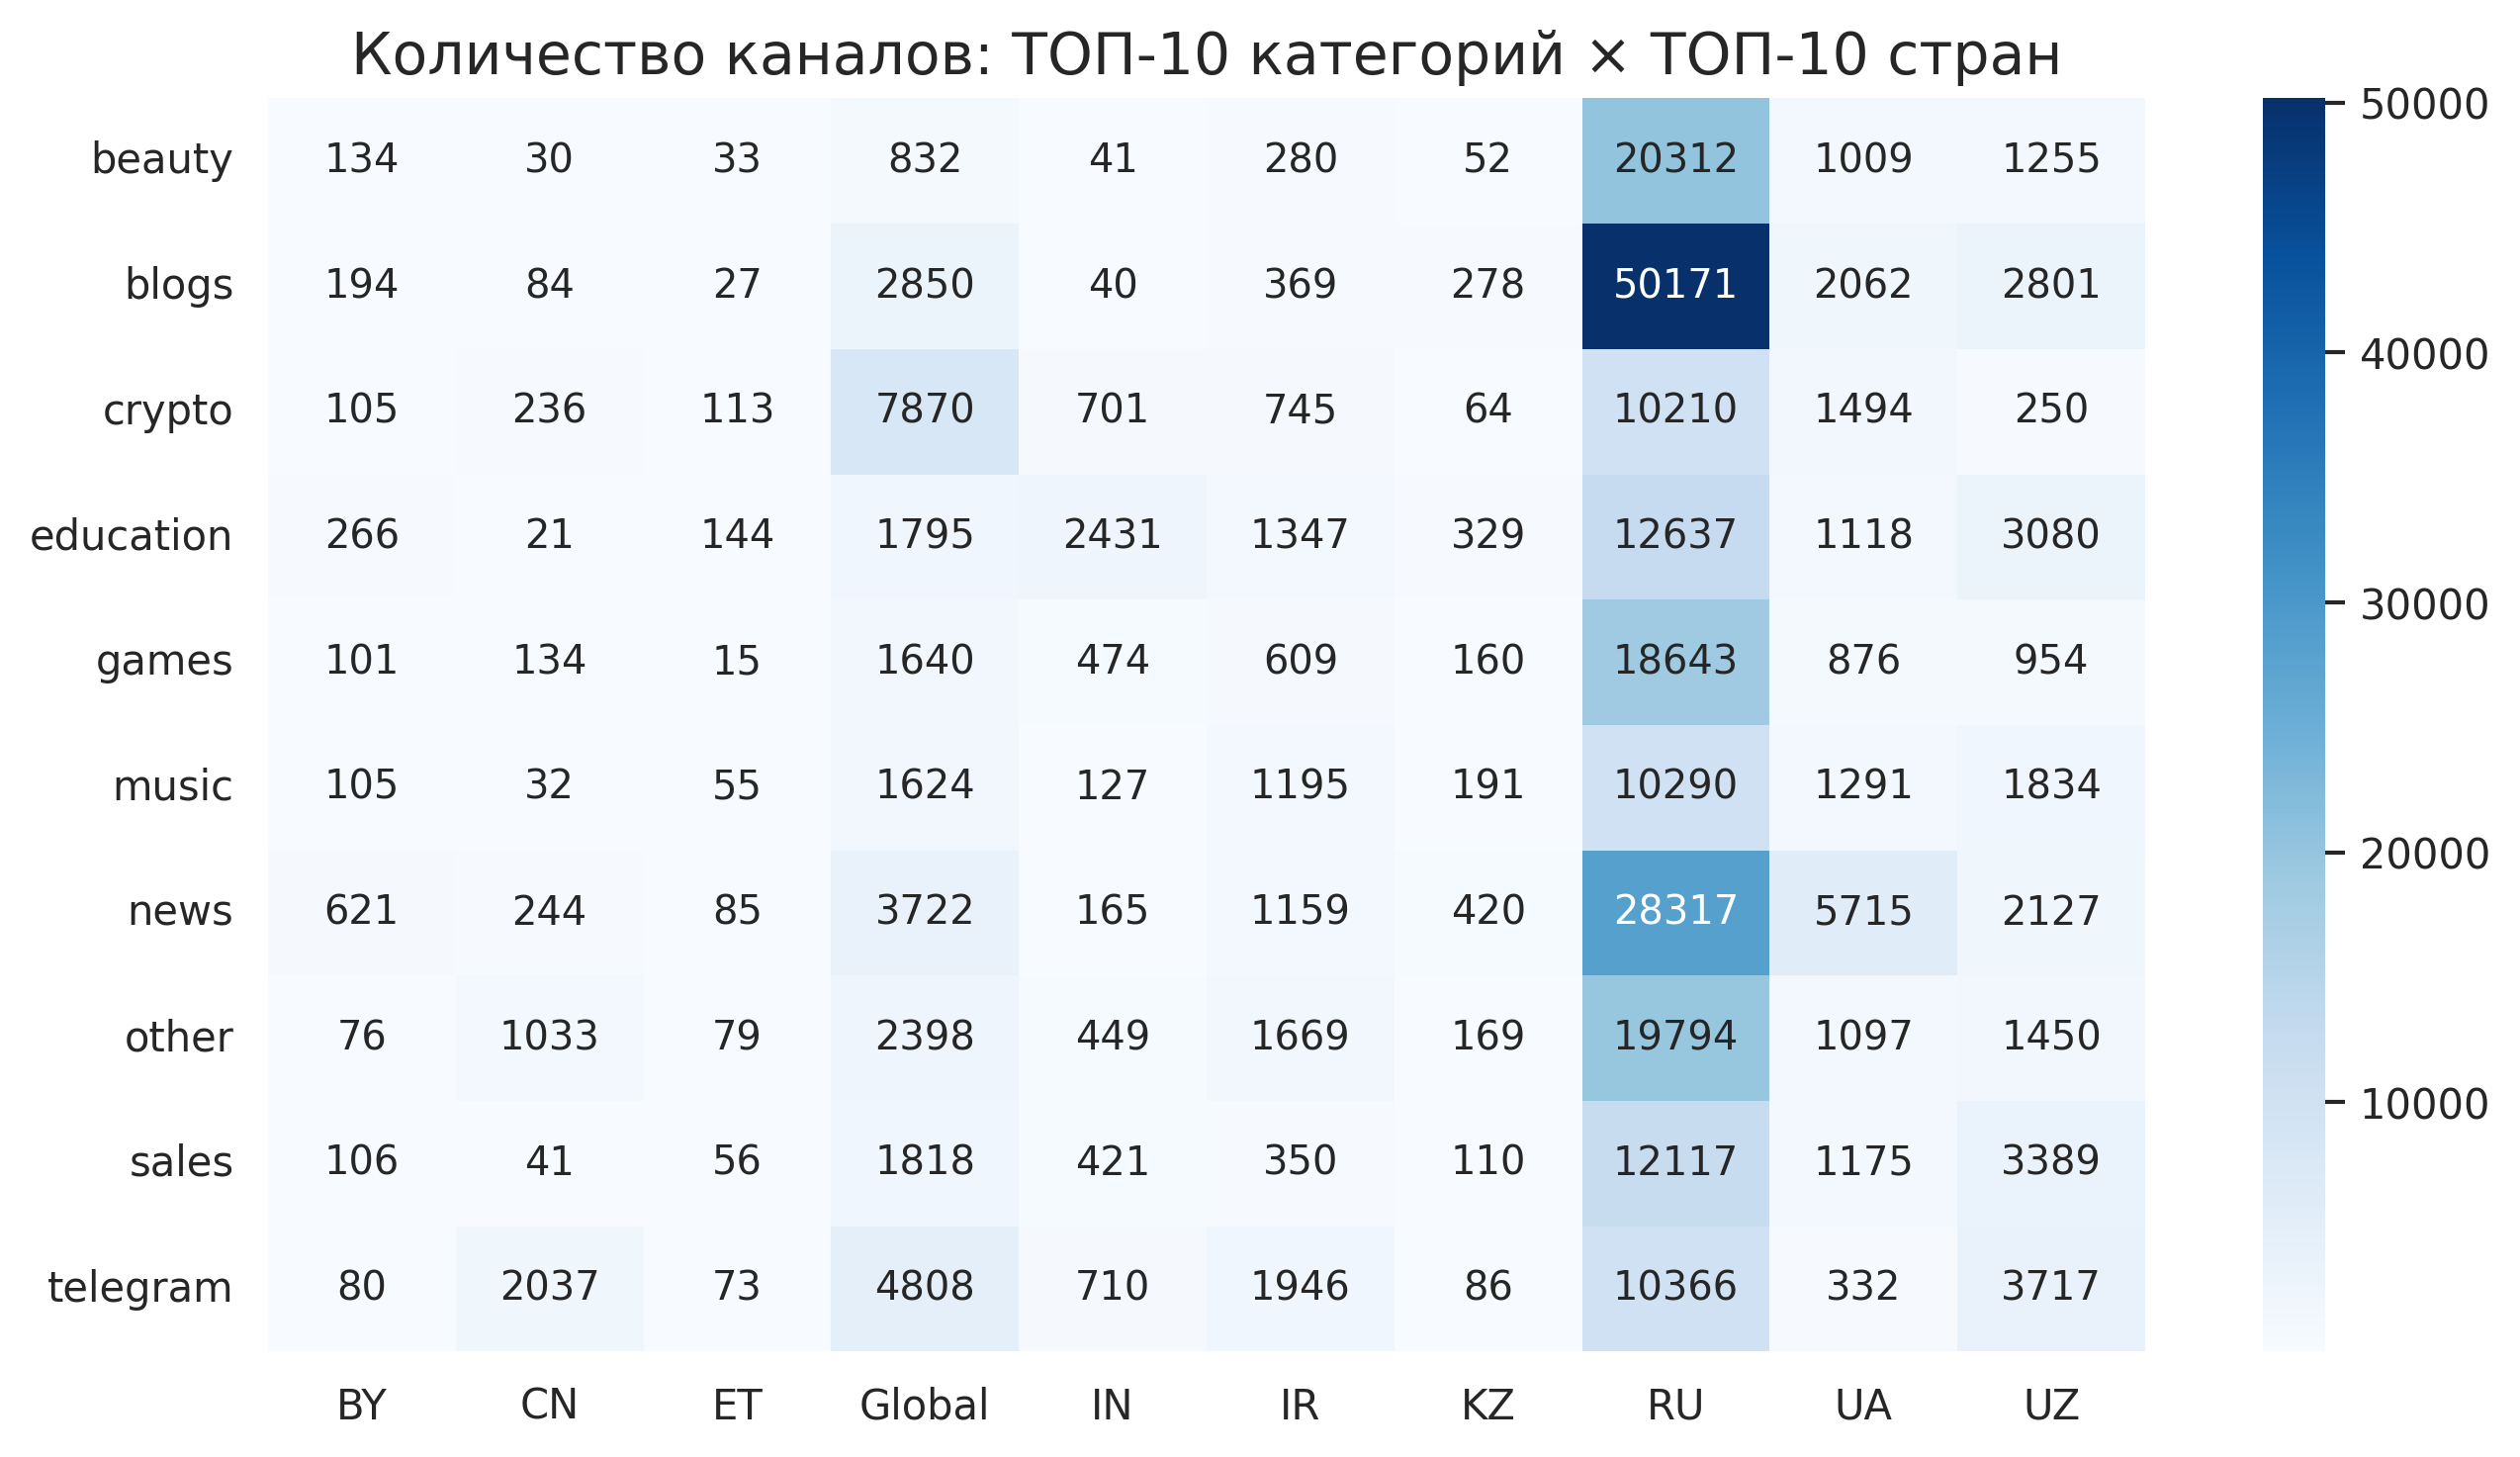

✓ Графики сохранены в папке «figures/» — готово к вставке в работу.


In [ ]:
# ───────────────────────────────────────────────
# 0. Оформление «доклад-RUS»
# ───────────────────────────────────────────────
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(
    style="whitegrid",
    context="paper",
    palette="colorblind",
    font="DejaVu Sans"   # замените, если нужен другой шрифт
)
plt.rcParams.update({
    "figure.dpi": 300,  "savefig.dpi": 300,
    "axes.titlesize": 14, "axes.labelsize": 12,
    "xtick.labelsize": 10, "ytick.labelsize": 10,
})


SAVE_DIR  = "figures"
os.makedirs(SAVE_DIR, exist_ok=True)
df = combined_df.copy()
# ───────────────────────────────────────────────
# 1. Загрузка
# ───────────────────────────────────────────────

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# ───────────────────────────────────────────────
# 2. Категории подписчиков
# ───────────────────────────────────────────────
bins   = [-1, 99, 999, 9_999, 99_999, 999_999, np.inf]
labels = [
    "≤ 100",
    "101 – 999",
    "1 000 – 9 999",
    "10 000 – 99 999",
    "100 000 – 999 999",
    "≥ 1 000 000"
]
df["Категория_подписчиков"] = pd.cut(df["subscribers"], bins=bins, labels=labels)

# ───────────────────────────────────────────────
# 3. Хелпер аннотаций (русская локаль)
# ───────────────────────────────────────────────
def annotate_bars(ax, horiz=False):
    for p in ax.patches:
        value = p.get_width() if horiz else p.get_height()
        txt   = f"{int(value):,}".replace(",", " ")   # тонкий неразрывный пробел
        if horiz:
            ax.text(value + value*0.01,               # справа
                    p.get_y() + p.get_height()/2,
                    txt, va="center", ha="left", fontsize=9)
        else:
            ax.text(p.get_x() + p.get_width()/2,
                    value, txt,
                    va="bottom", ha="center", fontsize=9)

# ───────────────────────────────────────────────
# 4. Распределение категорий подписчиков
# ───────────────────────────────────────────────
cat_counts = df["Категория_подписчиков"].value_counts().reindex(labels)

plt.figure(figsize=(10, 6))  # увеличиваем ширину
ax = sns.barplot(x=cat_counts.index, y=cat_counts.values)

# Улучшенные аннотации — выше столбца
for i, val in enumerate(cat_counts.values):
    ax.text(i, val + 4000, f"{val:,}".replace(",", " "),
            ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Категория по числу подписчиков")
ax.set_ylabel("Количество каналов")
ax.set_title("Распределение каналов по категориям аудитории")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/subscribers_categories_cleaned.png")
plt.show()

# ───────────────────────────────────────────────
# 5. ТОП-15 категорий контента (число каналов)
# ───────────────────────────────────────────────
top_cat = df["category"].value_counts().head(15)
plt.figure(figsize=(8,5))
ax = sns.barplot(y=top_cat.index, x=top_cat.values)
annotate_bars(ax, horiz=True)
ax.set_xlabel("Количество каналов")
ax.set_ylabel("")
ax.set_title("Топ-15 категорий контента по количеству каналов")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/top_categories_count.png")
plt.show()

# ───────────────────────────────────────────────
# 6. ТОП-15 стран (число каналов)
# ───────────────────────────────────────────────
top_country = df["country"].value_counts().head(15)
plt.figure(figsize=(8,5))
ax = sns.barplot(y=top_country.index, x=top_country.values)
annotate_bars(ax, horiz=True)
ax.set_xlabel("Количество каналов")
ax.set_ylabel("")
ax.set_title("Топ-15 стран по количеству каналов")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/top_countries_count.png")
plt.show()

# ───────────────────────────────────────────────
# 7. Среднее число подписчиков (ТОП-15 категорий)
# ───────────────────────────────────────────────
avg_subs = (df.groupby("category")["subscribers"]
              .mean().sort_values(ascending=False).head(15))
plt.figure(figsize=(8,5))
ax = sns.barplot(y=avg_subs.index, x=avg_subs.values)
annotate_bars(ax, horiz=True)
ax.set_xlabel("Среднее число подписчиков")
ax.set_ylabel("")
ax.set_title("Топ-15 категорий по средней аудитории канала")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/top_categories_avgsubs.png")
plt.show()

# ───────────────────────────────────────────────
# 8. Boxplot подписчиков (ТОП-5 категорий, лог-шкала)
# ───────────────────────────────────────────────
top5 = df["category"].value_counts().head(5).index
plt.figure(figsize=(7,4))
sns.boxplot(data=df[df["category"].isin(top5)],
            x="category", y="subscribers", showfliers=False)
plt.yscale("log")
plt.xlabel("")
plt.ylabel("Подписчики (лог-шкала)")
plt.title("Распределение аудитории в 5 крупнейших категориях")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/boxplot_top5_categories.png")
plt.show()

# ───────────────────────────────────────────────
# 9. Тепловая карта «категория × страна» (ТОП-10 × ТОП-10)
# ───────────────────────────────────────────────
cat10  = df["category"].value_counts().head(10).index
ctry10 = df["country"].value_counts().head(10).index
pivot  = (df[df["category"].isin(cat10) & df["country"].isin(ctry10)]
            .pivot_table(index="category", columns="country",
                         values="channel", aggfunc="count", fill_value=0))
plt.figure(figsize=(9,5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Количество каналов: ТОП-10 категорий × ТОП-10 стран")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.savefig(f"{SAVE_DIR}/heatmap_cat_country.png")
plt.show()

print(f"✓ Графики сохранены в папке «{SAVE_DIR}/» — готово к вставке в работу.")


In [ ]:
combined_df

In [ ]:
# RU → EN (для анализа)
category_mapping_ru_to_en = {
    "спорт": "sport",
    "дизайн": "design",
    "продажи": "sales",
    "образование": "education",
    "новости": "news",
    "крипта": "crypto",
    "строительство": "construction",
    "книги": "books",
    "блоги": "blogs",
    "технологии": "tech",
    "цитаты": "quotes",
    "природа": "nature",
    "игры": "games",
    "инстаграм": "instagram",
    "картинки": "pics",
    "политика": "politics",
    "карьера": "career",
    "телеграм": "telegram",
    "медицина": "medicine",
    "здоровье": "health",
    "экономика": "economics",
    "путешествия": "travels",
    "еда": "food",
    "видео": "video",
    "маркетинг": "marketing",
    "транспорт": "transport",
    "курсы": "courses",
    "другое": "other",
    "азартные игры": "gambling",
    "казино": "gambling",
    "музыка": "music",
    "искусство": "art",
    "психология": "psychology",
    "бизнес": "business",
    "религия": "religion",
    "право": "law",
    "развлекательное обучение": "edutainment",
    "учёба и юмор": "edutainment",
    "эзотерика": "esoterics",
    "языки": "language",
    "приложения": "apps",
    "красота": "beauty",
    "развлечения": "entertainment",
    "дети": "babies",
    "мамы и дети": "babies",
    "рукоделие": "handmade"
}

# EN → RU (для enriched текстов)
category_mapping_en_to_ru = {v: k.capitalize() for k, v in category_mapping_ru_to_en.items()}

country_mapping = {
    "RU": "Русский",
    "UA": "Украинский",
    "KZ": "Казахский",
    "IN": "Английский (Индия)",
    "UZ": "Узбекский",
    "BY": "Русский (Беларусь)",
    "ET": "Амхарский",
    "CN": "Китайский",
    "IR": "Персидский",
    "KG": "Кыргызский",
    "Global": "Международный"
}
def enrich_row(row):
    category = category_mapping_en_to_ru.get(str(row["category"]).lower(), "Другое")
    language = country_mapping.get(str(row["country"]).upper(), "Неизвестный язык")
    name = str(row["name"]) if pd.notna(row["name"]) else ""
    desc = str(row["description"]) if pd.notna(row["description"]) else ""

    return (
        f"Категория: {category}. "
        f"Язык канала: {language}. "
        f"Название: {name}. "
        f"Описание: {desc}"
    )

combined_df["text"] = combined_df.apply(enrich_row, axis=1)

In [ ]:
combined_df[combined_df['handle'] == '@gambetto_coffee']

,category,country,channel,handle,name,description,image,subscribers,text
442851,sport,RU,https://t.me/gambetto_coffee,@gambetto_coffee,Кофе и Шахматы,"Канал о шахматах и жизни, который можно почита...",https://static6.tgstat.ru/channels/_100/25/253...,1086,Категория: Спорт. Язык канала: Русский. Назван...


# E5

In [ ]:
# from transformers import AutoTokenizer, AutoModel
# import torch
# import torch.nn.functional as F
# import numpy as np
# import faiss
# from tqdm import tqdm

# # Устройство: A100
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Загрузка модели на GPU
# model_name = "intfloat/multilingual-e5-large-instruct"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name).to(device)
# model.eval()

# def get_embedding(texts: list[str], prefix="passage: ", batch_size=128):
#     """Получает эмбеддинги (нормированные) на GPU A100"""
#     all_embeddings = []

#     for i in tqdm(range(0, len(texts), batch_size), desc="Encoding embeddings"):
#         batch_texts = [prefix + t for t in texts[i:i+batch_size]]
#         encoded = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt").to(device)
#         with torch.no_grad():
#             output = model(**encoded)
#         embeddings = output.last_hidden_state[:, 0]
#         embeddings = F.normalize(embeddings, p=2, dim=1)
#         all_embeddings.append(embeddings.cpu())

#     return torch.cat(all_embeddings, dim=0).numpy()




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
import faiss
import numpy as np

# E5 модель
model_name = "intfloat/multilingual-e5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).eval().to("cuda")  # или "cpu"

def encode_query(text: str):
    """Получает эмбеддинг запроса для поиска"""
    with torch.no_grad():
        encoded = tokenizer("query: " + text, return_tensors="pt", truncation=True, padding=True).to("cuda")
        output = model(**encoded)
        emb = output.last_hidden_state[:, 0]
        emb = F.normalize(emb, p=2, dim=1)
        return emb.cpu().numpy()

# Загрузка индекса
index = faiss.read_index("/content/drive/MyDrive/telegram_channels_e5.index")

# Поиск по запросу
def search_channels(query, k=5):
    query_vec = encode_query(query)
    D, I = index.search(query_vec, k * 3)  # запас
    results = combined_df.iloc[I[0]]
    return results.head(k)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

In [ ]:
results = search_channels("каналы о кофейнях", k=15)
results

,category,country,channel,handle,name,description,image,subscribers,text
279536,food,RU,https://t.me/tdIcoffee,@tdIcoffee,ICoffee ТД,Официальный канал i Coffee о самом вкусном коф...,https://static9.tgstat.ru/channels/_100/34/34f...,432,Категория: Еда. Язык канала: Русский. Название...
275810,food,RU,https://t.me/BagginsCoffee,@BagginsCoffee,Baggins Coffee Канал,Мы готовим вкусный кофе каждый день,https://static6.tgstat.ru/channels/_100/53/53d...,3097,Категория: Еда. Язык канала: Русский. Название...
279366,food,RU,https://t.me/novatorcoffee,@novatorcoffee,новатор и кофе,Канал о людях. И о кофе,https://static10.tgstat.ru/channels/_100/a0/a0...,463,Категория: Еда. Язык канала: Русский. Название...
442851,sport,RU,https://t.me/gambetto_coffee,@gambetto_coffee,Кофе и Шахматы,"Канал о шахматах и жизни, который можно почита...",https://static6.tgstat.ru/channels/_100/25/253...,1086,Категория: Спорт. Язык канала: Русский. Назван...
302679,pics,RU,https://t.me/utrocoffeee,@utrocoffeee,Утренний стакан кофе,Канал с эстетическими life-изображениями. But ...,https://static8.tgstat.ru/channels/_100/86/86b...,102,Категория: Картинки. Язык канала: Русский. Наз...
500668,psychology,RU,https://t.me/morning_socionics,@morning_socionics,Соционика с кофе,Легко и весело о наших суперсилах.,https://static3.tgstat.ru/channels/_100/05/058...,321,Категория: Психология. Язык канала: Русский. Н...
280312,food,RU,https://t.me/iskusstvocoffee,@iskusstvocoffee,на витрине «искусство.кофе»,"канал с новостями из кофейни — про новинки, ко...",https://static10.tgstat.ru/channels/_100/e8/e8...,299,Категория: Еда. Язык канала: Русский. Название...
298347,pics,RU,https://t.me/waverlyex,@waverlyex,coffee on waverly place,alex.,https://static5.tgstat.ru/channels/_100/c5/c5e...,485,Категория: Картинки. Язык канала: Русский. Наз...
452789,tech,RU,https://t.me/BountyOnCoffee,@BountyOnCoffee,Bounty On Coffee,"Заметки по пентестам, bugbounty, разработке, м...",https://static8.tgstat.ru/channels/_100/a7/a76...,3796,Категория: Технологии. Язык канала: Русский. Н...
282324,food,RU,https://t.me/coffeepovenam,@coffeepovenam,Кофе по венам,"Добро пожаловать на канал, посвящённый кофе! З...",https://static4.tgstat.ru/channels/_100/00/004...,9,Категория: Еда. Язык канала: Русский. Название...


# Reranker

In [ ]:
from sentence_transformers import CrossEncoder
# Модель для reranking — мультиязычная, работает с русским
reranker = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", device="cuda")
def rerank_results(query: str, df, top_n=15):
    """Переупорядочивает найденные документы по их релевантности запросу"""
    if df.empty:
        return df

    pairs = [[query, passage] for passage in df["text"].tolist()]
    scores = reranker.predict(pairs)
    df["score"] = scores
    df_sorted = df.sort_values("score", ascending=False).head(top_n)
    return df_sorted.drop(columns=["score"])


def rerank_results_subs(query: str, df, top_n=15, alpha=0.4):
    """
    Rerank по смыслу + числу подписчиков.
    alpha — вес смысловой релевантности (0.0–1.0)
    """
    if df.empty:
        return df

    pairs = [[query, passage] for passage in df["text"].tolist()]
    semantic_scores = reranker.predict(pairs)

    # Безопасное извлечение количества подписчиков
    subs = df["subscribers"].fillna(0).astype(float)
    subs_log = np.log1p(subs)  # log(1 + x) — сглаживает большие числа

    # Нормализация
    subs_norm = (subs_log - subs_log.min()) / (subs_log.max() - subs_log.min() + 1e-8)
    sem_norm = (semantic_scores - np.min(semantic_scores)) / (np.max(semantic_scores) - np.min(semantic_scores) + 1e-8)

    # Гибридный скор
    final_score = alpha * sem_norm + (1 - alpha) * subs_norm

    df = df.copy()
    df["score"] = final_score
    return df.sort_values("score", ascending=False).head(top_n).drop(columns=["score"])

def search_channels(query, k=15, use_reranker=True):
    query_vec = encode_query(query)
    D, I = index.search(query_vec, k * 3)  
    results = combined_df.iloc[I[0]]

    if use_reranker:
        return rerank_results_subs(query, results, top_n=k)
    else:
        return results.head(k)


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

In [ ]:
def detect_category_country(query: str):
    detected_category = None
    detected_country = None

    # Категории (RU + EN)
    for ru_cat, en_cat in category_mapping_ru_to_en.items():
        if ru_cat.lower() in query.lower() or en_cat.lower() in query.lower():
            detected_category = en_cat
            break

    # Страны
    for code, country_name in country_mapping.items():
        if country_name.lower() in query.lower():
            detected_country = code
            break

    return detected_category, detected_country
def search_channels(query, k=5, use_reranker=True):
    # 1. Semantic Search по всему индексу
    query_vec = encode_query(query)
    D, I = index.search(query_vec, k * 20)  # запас побольше для фильтрации
    results = combined_df.iloc[I[0]]

    # 2. Попробуем определить категорию и страну из текста запроса
    detected_category, detected_country = detect_category_country(query)
    print(detected_category, detected_country)
    # 3. Фильтрация по категории и стране
    if detected_category:
        results = results[results["category"] == detected_category]
    if detected_country:
        results = results[results["country"] == detected_country]

    if results.empty:
        print(" Ничего не найдено после фильтрации")
        return pd.DataFrame()

    # 4. Reranking (если нужно)
    if use_reranker:
        return rerank_results(query, results, top_n=k)
    else:
        return results.head(k)


In [ ]:
results = search_channels("китайские каналы о политике", use_reranker=False, k=15)
results

None None


,category,country,channel,handle,name,description,image,subscribers,text
395448,news,CN,https://t.me/youdaozhengjing,@youdaozhengjing,有道政经,精选深度政经内容,https://static7.tgstat.ru/channels/_100/51/516...,7098,Категория: Новости. Язык канала: Китайский. На...
379137,politics,CN,https://t.me/CarlZha,@CarlZha,Carl Zha,"China, History, Politics and Culture",https://static5.tgstat.ru/channels/_100/ba/ba0...,1151,Категория: Политика. Язык канала: Китайский. Н...
375580,politics,CN,https://t.me/china9999999,@china9999999,中華安樂之友會,中華安樂之友會 感謝各位加入,https://static4.tgstat.ru/channels/_100/42/429...,8493,Категория: Политика. Язык канала: Китайский. Н...
374018,politics,CN,https://t.me/Integritys,@Integritys,白色豪門企業,白色豪門企業,https://static2.tgstat.ru/channels/_100/e9/e9b...,35625,Категория: Политика. Язык канала: Китайский. Н...
377579,politics,RU,https://t.me/Chinabrief,@Chinabrief,China brief,"Всё о политике, экономике Китая и его связях с...",https://static1.tgstat.ru/channels/_100/f4/f42...,2474,Категория: Политика. Язык канала: Русский. Наз...
383531,politics,CN,https://t.me/fightagainstbluec,@fightagainstbluec,搞鳩藍屍大行動 (半休台),公海 @fightagainstbluecgroup,https://static10.tgstat.ru/channels/_100/fe/fe...,121,Категория: Политика. Язык канала: Китайский. Н...
378975,politics,CN,https://t.me/HKlinkedROC,@HKlinkedROC,🇹🇼 民國香港連綫 🇹🇼,三民主義 統一中國,https://static8.tgstat.ru/channels/_100/f5/f52...,1237,Категория: Политика. Язык канала: Китайский. Н...
376009,politics,Global,https://t.me/spotlightoncn,@spotlightoncn,China News and Insights,Provide viewers factual news and insights abou...,https://static5.tgstat.ru/channels/_100/2d/2d9...,6348,Категория: Политика. Язык канала: Неизвестный ...
377557,politics,CN,https://t.me/ZeeGwatnews,@ZeeGwatnews,💢 ZeeGwat🦉🦉💢,ZeeGwat Media Presenting,https://static8.tgstat.ru/channels/_100/13/137...,2499,Категория: Политика. Язык канала: Китайский. Н...
374836,politics,CN,https://t.me/whitepaperevolution,@whitepaperevolution,白纸革命🅥,白纸革命官方频道,https://static3.tgstat.ru/channels/_100/45/45f...,14752,Категория: Политика. Язык канала: Китайский. Н...


In [ ]:
def generate_recommendation(results_df):
    context = "\n".join([
        f"Описание: {row['text']}\nСсылка: {row['handle']}\nПодписчики: {row['subscribers']}"
        for _, row in results_df.iterrows()
    ])
    prompt = f"""
Пользователь ищет телеграм-каналы

Вот подходящие описания каналов:
{context}

Предложи 10 каналов.
Выведи в таком формате:
1. Канал: name
Cсылка: handle
Описание: description
Кол-во подписчиков: subscribers
...
"""

    response = llm.invoke(prompt)
    return response.content


In [ ]:
results = search_channels("предложи топ русских каналов по музыке", k=10)
results

None None


<ipython-input-10-8560ec132a8a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["score"] = scores


,category,country,channel,handle,name,description,image,subscribers,text
362104,music,RU,https://t.me/choensex,@choensex,КОМПРОМАТ,первый и давно созданный канал про чоен| это н...,https://static2.tgstat.ru/channels/_100/b5/b5d...,132,Категория: Музыка. Язык канала: Русский. Назва...
355013,music,RU,https://t.me/egozvalinikita,@egozvalinikita,Прекрасная Россия прошлого,"Не смотри на меня так, я просто чувак",https://static4.tgstat.ru/channels/_100/eb/ebc...,1410,Категория: Музыка. Язык канала: Русский. Назва...
357433,music,RU,https://t.me/slushayvnimatelno,@slushayvnimatelno,слушай внимательно,я просто попробую снова.,https://static10.tgstat.ru/channels/_100/e6/e6...,642,Категория: Музыка. Язык канала: Русский. Назва...
361844,music,RU,https://t.me/dudeisavedthis,@dudeisavedthis,"чувак, я добавил","о том, почему ты должен пополнить плейлист",https://static5.tgstat.ru/channels/_100/16/161...,150,Категория: Музыка. Язык канала: Русский. Назва...
358705,music,RU,https://t.me/deaddendlive,@deaddendlive,Прямоугольный канал,"Пишу всё что вижу, хотя бы чуть чуть связанное...",https://static1.tgstat.ru/channels/_100/df/df3...,444,Категория: Музыка. Язык канала: Русский. Назва...
358385,music,RU,https://t.me/blackandsbm,@blackandsbm,ℌ𝔢𝔯𝔷𝔷𝔢𝔯𝔯𝔢𝔦ß𝔢𝔫𝔡𝔢 𝔐𝔲𝔰𝔦𝔨,Цель канала - просвещение и ознакомление с гру...,https://static9.tgstat.ru/channels/_100/82/821...,487,Категория: Музыка. Язык канала: Русский. Назва...
357811,music,RU,https://t.me/quotes_dramas,@quotes_dramas,Дᴏᴩᴀʍный Рᴀй,Добро пожаловать в канал-путеводитель по миру ...,https://static9.tgstat.ru/channels/_100/89/89e...,576,Категория: Музыка. Язык канала: Русский. Назва...
353563,music,RU,https://t.me/PogovorimOnline,@PogovorimOnline,Поговорим.онлайн,Онлайн-консультации с лучшими психологами и ко...,https://static10.tgstat.ru/channels/_100/00/00...,2608,Категория: Музыка. Язык канала: Русский. Назва...
363862,music,RU,https://t.me/orvzegorov,@orvzegorov,сынок поставь свою музыку послушать,тут поют плохие каверы,https://static10.tgstat.ru/channels/_100/1c/1c...,52,Категория: Музыка. Язык канала: Русский. Назва...
352279,music,RU,https://t.me/maratnig,@maratnig,Канал Марата Нигматуллина,Посеешь душу - пожнёшь любовь,https://static5.tgstat.ru/channels/_100/a8/a87...,5154,Категория: Музыка. Язык канала: Русский. Назва...


In [ ]:
print(generate_recommendation(results))

Вот 10 телеграм-каналов из списка:  

1. **Канал**: КОМПРОМАТ  
   **Ссылка**: [@choensex](https://t.me/choensex)  
   **Описание**: Первый и давно созданный канал про чоен | это не новостной канал, это просто архив | по вопросам пиши @tvoya_oksi  
   **Кол-во подписчиков**: 132  

2. **Канал**: Прекрасная Россия прошлого  
   **Ссылка**: [@egozvalinikita](https://t.me/egozvalinikita)  
   **Описание**: Не смотри на меня так, я просто чувак  
   **Кол-во подписчиков**: 1410  

3. **Канал**: слушай внимательно  
   **Ссылка**: [@slushayvnimatelno](https://t.me/slushayvnimatelno)  
   **Описание**: Я просто попробую снова.  
   **Кол-во подписчиков**: 642  

4. **Канал**: чувак, я добавил  
   **Ссылка**: [@dudeisavedthis](https://t.me/dudeisavedthis)  
   **Описание**: О том, почему ты должен пополнить плейлист  
   **Кол-во подписчиков**: 150  

5. **Канал**: Прямоугольный канал  
   **Ссылка**: [@deaddendlive](https://t.me/deaddendlive)  
   **Описание**: Пишу всё что вижу, хотя бы чу

In [ ]:
from transformers import AutoTokenizer, AutoModel
import os

model_name = "intfloat/multilingual-e5-large"
save_dir = "/content/e5_large_local"

# Сохраняем токенизатор и модель
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer.save_pretrained(save_dir)
model.save_pretrained(save_dir)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

# RAG

In [ ]:
import os
import numpy as np
import pandas as pd
import faiss
from typing import Optional
from sentence_transformers import SentenceTransformer, CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
import torch

class TelegramChannelRecommenderAgent:
    def __init__(self,
                 data_path: str,
                 index_path: str,
                 openai_api_key: str,
                 openai_api_base: str = "https://api.deepseek.com/v1",
                 model_name: str = "deepseek-chat"):

        self.df = combined_df
        self.index = faiss.read_index(index_path)
        self.embed_model = SentenceTransformer("intfloat/multilingual-e5-large")
        self.reranker = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", device="cuda" if torch.cuda.is_available() else "cpu")
        self.llm = ChatOpenAI(openai_api_key=openai_api_key, openai_api_base=openai_api_base, model=model_name)

        self.category_embeddings = self.embed_model.encode([f"query: {cat}" for cat in self.df['category'].unique().tolist()])

    def search_channels(self, query: str, k: int = 10) -> pd.DataFrame:
        query_vec = self.embed_model.encode([f"query: {query}"])
        D, I = self.index.search(np.array(query_vec), k * 5)
        return self.df.iloc[I[0]].copy()

    def rerank_results(self, query: str, df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
        pairs = [[query, text] for text in df["text"]]
        scores = self.reranker.predict(pairs)
        df = df.copy()
        df["score"] = scores
        return df.sort_values("score", ascending=False).head(top_n)

    def generate_recommendation(self, query: str, results_df: pd.DataFrame) -> str:
        context = "\n".join([
            f"Описание: {row['text']}\nСсылка: {row['handle']}\nПодписчики: {row['subscribers']}"
            for _, row in results_df.iterrows()
        ])
        prompt = f"""
Пользователь ищет телеграм-каналы

Вот подходящие описания каналов:
{context}

Предложи 10 каналов.
Выведи в таком формате:
1. Канал: name
Cсылка: handle
Описание: description
Кол-во подписчиков: subscribers
...
"""
        response = self.llm.invoke(prompt)
        return response.content

    def infer_category(self, query: str) -> Optional[str]:
        query_embedding = self.embed_model.encode([f"query: {query}"])
        sims = cosine_similarity(query_embedding, self.category_embeddings)[0]
        best_idx = np.argmax(sims)
        return self.df['category'].unique().tolist()[best_idx]

    def run(self, query: str, use_reranker: bool = True) -> str:
        results = self.search_channels(query)
        if use_reranker:
            results = self.rerank_results(query, results)
        return self.generate_recommendation(query, results)


# Пример использования:
if __name__ == "__main__":
    agent = TelegramChannelRecommenderAgent(
        data_path="/content/drive/MyDrive/diploma/combined_df.csv",
        index_path ='/content/drive/MyDrive/telegram_channels_e5.index',
        openai_api_key=" "
    )

    query = "Посоветуй каналы по маркетингу для стартапов"
    result = agent.run(query)
    print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

<ipython-input-6-22f0be5dbee1>:24: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  self.llm = ChatOpenAI(openai_api_key=openai_api_key, openai_api_base=openai_api_base, model=model_name)


Вот 10 подходящих каналов в запрошенном формате:  

1. **Канал:** АЛЕКСА ПРО ЗАПУСКИ И DIGITAL  
   **Ссылка:** @ALEXAMARKETING_CHANNEL  
   **Описание:** Как сделать запуск и купить с него квартиру  
   **Кол-во подписчиков:** 297  

2. **Канал:** Идеи для стартапов  
   **Ссылка:** @ideas_for_startup  
   **Описание:** Есть вопросы? Пиши @vnukkarpov  
   **Кол-во подписчиков:** 270  

3. **Канал:** Продается  
   **Ссылка:** @MariVIZZ  
   **Описание:** На продаже -> @Mariis_an  
   **Кол-во подписчиков:** 71  

4. **Канал:** Qashqadaryo e'lonlari  
   **Ссылка:** @Shahrisabz_Qarshi_Qashqadaryob  
   **Описание:** Реклама ва эълон бериш учун  
   **Кол-во подписчиков:** 43 989  

5. **Канал:** Moshina bozor  
   **Ссылка:** @mashina_bozor  
   **Описание:** Эълон бериш учун @MOSHINA_ADMINZ  
   **Кол-во подписчиков:** 7 070  

6. **Канал:** قناة ابو فلاح الحلاوي  
   **Ссылка:** @Hasson610  
   **Описание:** اللهم صلي وسلم وبارك على سيدنا محمد  
   **Кол-во подписчиков:** 2 013  

7.

In [ ]:
query = "Посоветуй русские каналы про музыку"
result = agent.run(query)
print(result)

Вот 10 музыкальных Telegram-каналов на русском языке:  

1. **Канал**: слушай внимательно  
   **Ссылка**: [@slushayvnimatelno](https://t.me/slushayvnimatelno)  
   **Описание**: я просто попробую снова  
   **Кол-во подписчиков**: 642  

2. **Канал**: Что послушать  
   **Ссылка**: [@chto_music](https://t.me/chto_music)  
   **Описание**: Новое музыкальное медиа  
   **Кол-во подписчиков**: 1966  

3. **Канал**: Бесконечная Неопределенность  
   **Ссылка**: [@Endless_Uncertainty_Music](https://t.me/Endless_Uncertainty_Music)  
   **Описание**: @Wonderfull_Envy - по всем вопросам  
   **Кол-во подписчиков**: 15  

4. **Канал**: совершенно субъективно  
   **Ссылка**: [@sovsub300](https://t.me/sovsub300)  
   **Описание**: слушайте только хорошую музыку!  
   **Кол-во подписчиков**: 29  

5. **Канал**: вечностьтошнит  
   **Ссылка**: [@vech_yun](https://t.me/vech_yun)  
   **Описание**: плачь детка  
   **Кол-во подписчиков**: 9144  

6. **Канал**: MuZik  
   **Ссылка**: [@p0db0r04ka](h

In [ ]:
# ✅ Telegram бот
import asyncio
import logging
from telegram import Update
from telegram.ext import ApplicationBuilder, CommandHandler, MessageHandler, ContextTypes, filters



TELEGRAM_BOT_TOKEN = " "
logging.basicConfig(level=logging.INFO)

async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text("Привет! Напиши, что ты ищешь — и я подберу каналы.")

async def handle_message(update: Update, context: ContextTypes.DEFAULT_TYPE):
    query = update.message.text
    await update.message.reply_text(" Думаю над ответом...")
    try:
        response = agent.run(query)
        await update.message.reply_text(response)
    except Exception as e:
        await update.message.reply_text("Возникла ошибка. Попробуй позже.")
        logging.error(f"Ошибка: {e}")

app = ApplicationBuilder().token(TELEGRAM_BOT_TOKEN).build()
app.add_handler(CommandHandler("start", start))
app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

async def run_bot():
    await app.initialize()
    await app.start()
    print("Бот запущен! Напиши ему в Telegram.")
    await app.updater.start_polling()
    await asyncio.Event().wait()

await run_bot()

✅ Бот запущен! Напиши ему в Telegram.


CancelledError: 

In [ ]:
!pip install langchain_community transformers faiss-cpu torch  python-telegram-bot[asyncio] langchain openai transformers faiss-cpu sentence-transformers pandas torch fastapi uvicorn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95

# Agent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import faiss
from typing import Optional
from sentence_transformers import SentenceTransformer, CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.tools import tool
import torch

class TelegramChannelRecommenderAgent:
    def __init__(self,
                 data_path: str,
                 index_path: str,
                 openai_api_key: str,
                 openai_api_base: str = "https://api.deepseek.com/v1",
                 model_name: str = "deepseek-chat"):

        self.df = combined_df
        self.index = faiss.read_index(index_path)
        self.embed_model = SentenceTransformer("intfloat/multilingual-e5-large")
        self.reranker = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2", device="cuda" if torch.cuda.is_available() else "cpu")
        self.llm = ChatOpenAI(openai_api_key=openai_api_key, openai_api_base=openai_api_base, model=model_name)

        self.category_embeddings = self.embed_model.encode([f"query: {cat}" for cat in self.df['category'].unique().tolist()])

    def search_channels(self, query: str, k: int = 10) -> pd.DataFrame:
        print(" Вызван метод: search_channels")
        query_vec = self.embed_model.encode([f"query: {query}"])
        D, I = self.index.search(np.array(query_vec), k * 5)
        return self.df.iloc[I[0]].copy()

    def rerank_results(self, query: str, df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
        print(" Вызван метод: rerank_results")
        pairs = [[query, text] for text in df["text"]]
        scores = self.reranker.predict(pairs)
        df = df.copy()
        df["score"] = scores
        return df.sort_values("score", ascending=False).head(top_n)

    def generate_recommendation(self, query: str, results_df: pd.DataFrame) -> str:
        print(" Вызван метод: generate_recommendation")
        context = "\n".join([
            f"Описание: {row['description']}\nСсылка: {row['handle']}\nПодписчики: {row['subscribers']}"
            for _, row in results_df.iterrows()
        ])
        prompt = f"""
Пользователь ищет телеграм-каналы

Вот подходящие описания каналов:
{context}

Предложи 10 каналов.
Выведи в таком формате:
1. Канал: name
Cсылка: handle
Описание: description
Кол-во подписчиков: subscribers
...
"""
        response = self.llm.invoke(prompt)
        return response.content

    def infer_category(self, query: str) -> Optional[str]:
        query_embedding = self.embed_model.encode([f"query: {query}"])
        sims = cosine_similarity(query_embedding, self.category_embeddings)[0]
        best_idx = np.argmax(sims)
        return self.df['category'].unique().tolist()[best_idx]

    def run(self, query: str, use_reranker: bool = True) -> str:
        results = self.search_channels(query)
        if use_reranker:
            results = self.rerank_results(query, results)
        return self.generate_recommendation(query, results)



    @tool("Получить информацию о телеграм-канале по названию.")
    def get_channel_info(self, name: str) -> str:
        """Предоставляет подробную информацию о канале по его названию: описание, ссылка, подписчики и прочее."""
        print(" Инструмент: get_channel_info")
        match = self.df[self.df['name'].str.contains(name, case=False, na=False)]
        if match.empty:
            return "Канал не найден."
        row = match.iloc[0]
        return f"Название: {row['name']}\nОписание: {row['text']}\nСсылка: {row['handle']}\nПодписчики: {row['subscribers']}\nКатегория: {row['category']}\nСтрана: {row['country']}"

    @tool("Сравнить два телеграм-канала по их названиям.")
    def compare_channels(self, name1: str, name2: str) -> str:
        """Сравнивает два канала по названию и выводит ключевую информацию о каждом."""
        print(" Инструмент: compare_channels")
        df1 = self.df[self.df['name'].str.contains(name1, case=False, na=False)]
        df2 = self.df[self.df['name'].str.contains(name2, case=False, na=False)]
        if df1.empty or df2.empty:
            return "Один или оба канала не найдены."
        def fmt(row):
            return f"{row['name']} — {row['text']}\nСсылка: {row['handle']} | Подписчики: {row['subscribers']}"
        return f"Канал 1:\n{fmt(df1.iloc[0])}\n\nКанал 2:\n{fmt(df2.iloc[0])}"

# Пример использования:
if __name__ == "__main__":
    agent = TelegramChannelRecommenderAgent(
        data_path="/content/drive/MyDrive/diploma/combined_df.csv",
        index_path='/content/drive/MyDrive/telegram_channels_e5.index',
        openai_api_key=" "
    )

    query = "Посоветуй каналы по маркетингу для стартапов"
    result = agent.run(query)
    print(result)


🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
Вот 10 телеграм-каналов с их описаниями и статистикой:  

1. **Канал:** ALEXA MARKETING  
   **Ссылка:** @ALEXAMARKETING_CHANNEL  
   **Описание:** Как сделать запуск и купить с него квартиру  
   **Кол-во подписчиков:** 297  

2. **Канал:** ANTIQUOTA ANDOLON BD  
   **Ссылка:** @antiquotaandolonbd  
   **Описание:** ©Official Channel  
   **Кол-во подписчиков:** 15 578  

3. **Канал:** IDEAS FOR STARTUP  
   **Ссылка:** @ideas_for_startup  
   **Описание:** Есть вопросы? Пиши @vnukkarpov  
   **Кол-во подписчиков:** 270  

4. **Канал:** JSM DMDLDGKFM  
   **Ссылка:** @jsmdmdldgkfm  
   **Описание:** ‏﴿إِنَّ اللَّهَ وَمَلَائِكَتَهُ يُصَلُّونَ عَلَى النَّبِيِّ ۚ يَا أَيُّهَا الَّذِينَ آمَنُوا صَلُّوا عَلَيْهِ وَسَلِّمُوا تَسْلِيمًا﴾  
   **Кол-во подписчиков:** 102  

5. **Канал:** Mari VIZZ  
   **Ссылка:** @MariVIZZ  
   **Описание:** На продаже -> @Mariis_an  
   **Кол-во подписчико

In [ ]:
# ✅ Telegram бот
import asyncio
import logging
from telegram import Update
from telegram.ext import ApplicationBuilder, CommandHandler, MessageHandler, ContextTypes, filters



TELEGRAM_BOT_TOKEN = " "
logging.basicConfig(level=logging.INFO)

async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    await update.message.reply_text("Привет! Напиши, что ты ищешь — и я подберу каналы.")

async def handle_message(update: Update, context: ContextTypes.DEFAULT_TYPE):
    query = update.message.text
    await update.message.reply_text("Думаю над ответом...")
    try:
        response = agent.run(query)
        await update.message.reply_text(response)
    except Exception as e:
        await update.message.reply_text("⚠️ Возникла ошибка. Попробуй позже.")
        logging.error(f"Ошибка: {e}")

app = ApplicationBuilder().token(TELEGRAM_BOT_TOKEN).build()
app.add_handler(CommandHandler("start", start))
app.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, handle_message))

async def run_bot():
    await app.initialize()
    await app.start()
    print(" Бот запущен! Напиши ему в Telegram.")
    await app.updater.start_polling()
    await asyncio.Event().wait()

await run_bot()

✅ Бот запущен! Напиши ему в Telegram.
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation
🔧 Вызван метод: search_channels
🔧 Вызван метод: rerank_results
🔧 Вызван метод: generate_recommendation


CancelledError: 